## ABC Jewelry Marketing Campaign Analysis (May-Dec 2022)

**Objective: Analyze the ROI of a 7-month long campaign of ABC Jewelry, using Clickthrough Rate (CTR), Cost-per-click (CPC) and Cost-per-mile (CPM)**

### 1. Data Importing and Cleaning

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/tk_ko/Desktop/Python/ABC Jewelry Marketing Campaign Analysis (May-Dec 2022)/marketing_campaign_dataset.csv")

In [3]:
#Display the first 10 rows
df.head(10)

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,...,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,...,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry
5,2766,53,2022-05-31,4,Google Ads,1005,0.0,0.0,#Be Bold. Be X,23.0,...,1,35.673124,NaN,NaN,NaN,Youtube,USD,America/New_York,week_day,beaded bracelets
6,2766,54,2022-06-01,4,Google Ads,1005,0.0,0.0,#The Ultimate Fashion Statement with X,23.0,...,1,43.150656,NaN,NaN,NaN,Youtube,USD,America/New_York,week_day,bridal jewelry
7,2766,55,2022-06-02,16,DV360,1005,0.0,0.0,#The Ultimate Fashion Statement with X,23.0,...,1,31.436393,NaN,NaN,NaN,Youtube,USD,America/New_York,week_day,unique and trendy jewelry
8,2766,56,2022-06-03,16,DV360,1005,0.0,0.0,#The X Factor - Fashion for the Fearless,23.0,...,1,5.409166,NaN,NaN,NaN,Youtube,USD,America/New_York,week_day,clip-on earrings
9,2766,57,2022-06-04,128,Facebook Ads,1005,0.0,0.0,#Be Bold. Be X,23.0,...,1,5.965384,NaN,NaN,NaN,Youtube,USD,America/New_York,week_day,bohemian jewelry


In [4]:
#Describes the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

In [27]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
campaign_item_id,72114.0,3130.633885,2766.0,3149.0,3173.0,3202.0,3960.0,142.14498
no_of_days,72114.0,27.144591,0.0,9.0,19.0,37.0,118.0,25.524158
time,72114,2022-09-26 23:05:45.952241920,2022-05-01 00:00:00,2022-08-20 00:00:00,2022-10-11 00:00:00,2022-11-05 00:00:00,2022-12-10 00:00:00,NaN
ext_service_id,72114.0,49.454919,4.0,4.0,16.0,128.0,128.0,55.883247
creative_id,72114.0,7460.389799,1005.0,3735.0,7900.0,10995.0,15605.0,4058.833785
creative_width,72114.0,255.274981,0.0,300.0,300.0,300.0,300.0,106.851938
creative_height,72114.0,212.729151,0.0,250.0,250.0,250.0,250.0,89.043282
template_id,72114.0,79.20713,0.0,90.0,90.0,90.0,93.0,26.834045
advertiser_id,72114.0,6195.56107,5191.0,6319.0,6385.0,6394.0,6490.0,388.837854
network_id,72114.0,345.230801,188.0,353.0,353.0,353.0,353.0,23.745117


We can also observe the counts and basic aggregations of each column more clearly, such as mean and median.

In [28]:
df['time'] = pd.to_datetime(df['time'])

Currently, 'time' is an object that needs to be converted into datetime64.
I convert 'time' to datetime64 to be used for time series analysis in the plots in later sections.

In [7]:
columns_to_drop = ['position_in_content', 'unique_reach', 'total_reach', 'max_bid_cpm', 'network_margin']
df = df.drop(columns=columns_to_drop)

Dropped position_in_content, unique_reach, total_reach because these columns are empty. max_bid_cpm, network_margin are also dropped as they are unnecessary for our analysis.

In [8]:
#Check for nulls
df.isnull().sum()

campaign_item_id          0
no_of_days                0
time                      0
ext_service_id            0
ext_service_name          0
creative_id               0
creative_width         3412
creative_height        3412
search_tags               0
template_id            3412
landing_page              0
advertiser_id             0
advertiser_name           0
network_id                0
approved_budget         406
advertiser_currency       0
channel_id                0
channel_name              0
campaign_budget_usd       0
impressions               0
clicks                    0
stats_currency            0
currency_code             0
exchange_rate             0
media_cost_usd            0
search_tag_cat            0
cmi_currency_code         0
timezone                  0
weekday_cat               0
keywords                  0
dtype: int64

There are two columns for budget: approved_budget (which has null values) and campaign_budget_usd. I use campaign_budget_usd as a benchmark for campaign budget instead because that is the actual budget allocated.

In [ ]:
#Sanity check to make sure that for every row, campaign_bud_usd < approved_budget
comparison = df['campaign_budget_usd'] < df['approved_budget']

#Printing the number of rows with campaign budget < approved budget
print(comparison.value_counts())

There are 498 rows whose approved budget < campaign budget, which is unlikely to be feasible since approved budget should always be more than campaign budget.

In [ ]:
#Filter the dataframe to include only rows where campaign budget < approved budget
df_filtered = df[comparison]
df = df_filtered

In [10]:
#Impute null values in creative_width, creative_height and template_id with 0
df['creative_width'] = df['creative_width'].fillna(0)
df['creative_height'] = df['creative_height'].fillna(0)
df['template_id'] = df['template_id'].fillna(0)

In [11]:
#Check for nulls again
df.isnull().sum()

campaign_item_id       0
no_of_days             0
time                   0
ext_service_id         0
ext_service_name       0
creative_id            0
creative_width         0
creative_height        0
search_tags            0
template_id            0
landing_page           0
advertiser_id          0
advertiser_name        0
network_id             0
approved_budget        0
advertiser_currency    0
channel_id             0
channel_name           0
campaign_budget_usd    0
impressions            0
clicks                 0
stats_currency         0
currency_code          0
exchange_rate          0
media_cost_usd         0
search_tag_cat         0
cmi_currency_code      0
timezone               0
weekday_cat            0
keywords               0
dtype: int64

In [12]:
#Check for duplicate rows. There are no duplicate rows.
duplicates = df.duplicated()
df[duplicates]

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,clicks,stats_currency,currency_code,exchange_rate,media_cost_usd,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords


### 2. Exploratory Analysis on Best Performing Campaigns

Impressions and clicks are the initial KPIs available in the dataset. To provide a more well-rounded view of the campaign's performance, I create additional KPIs to be included in the dataframe.

In [13]:
#Cost-per-click
df['Cost-per-click'] = df['media_cost_usd']/df['clicks']
#Cost-per-mile (1 mile = 1000 impressions)
df['Cost-per-mile'] = df['media_cost_usd']/(df['impressions']/1000)
#Click-through-rate (CTR)
df['CTR'] = df['clicks']/df['impressions']

To find out which campaign IDs performed the best for each KPI, I run groupby on campaign_item_id and pair it with the KPIs to find out which campaigns perform the best.

In [14]:
campaignID_grp = df.groupby(['campaign_item_id'])
KPI_per_campaignID_grp = campaignID_grp.agg(
    {'Cost-per-click' : 'mean',
     'Cost-per-mile' : 'mean',
     'CTR' : 'mean'
    }).reset_index()

KPI_per_campaignID_grp

,campaign_item_id,Cost-per-click,Cost-per-mile,CTR
0,2766,0.525402,6.980851,0.013842
1,2802,0.396123,6.120774,0.026189
2,2850,0.275426,4.418527,0.019008
3,2851,0.402994,4.695525,0.011677
4,2879,2.866061,59.047343,0.021490
...,...,...,...,...
151,3563,0.213867,9.395204,0.051371
152,3567,0.097327,3.594990,0.047043
153,3719,6.323869,40.190029,0.006419
154,3959,1.137338,9.969881,0.010985


In [15]:
KPI_per_campaignID_grp.sort_values(by='Cost-per-click', ascending = True)

,campaign_item_id,Cost-per-click,Cost-per-mile,CTR
12,3033,0.089188,3.648599,0.056990
152,3567,0.097327,3.594990,0.047043
9,2977,0.097933,4.363586,0.122229
143,3533,0.103235,5.535999,0.082879
127,3384,0.105250,4.972198,0.057226
...,...,...,...,...
120,3220,1.651970,15.500220,0.011287
60,3156,1.719310,19.996078,0.015910
119,3219,2.400361,25.343013,0.011976
4,2879,2.866061,59.047343,0.021490


Out of 156 campaigns, campaign ID 3033 has the best cost-per-click average at USD$0.08 per click.

In [16]:
KPI_per_campaignID_grp.sort_values(by='Cost-per-mile', ascending = True)

,campaign_item_id,Cost-per-click,Cost-per-mile,CTR
105,3202,0.123594,1.232427,0.012037
118,3218,0.139493,1.262114,0.011897
102,3199,0.121140,1.306598,0.012443
116,3216,0.111810,1.369404,0.012610
107,3207,0.139122,1.432027,0.012459
...,...,...,...,...
60,3156,1.719310,19.996078,0.015910
125,3355,0.853802,21.867769,0.025896
119,3219,2.400361,25.343013,0.011976
153,3719,6.323869,40.190029,0.006419


Campaign ID 3202 also has the best cost-per-mile average at $1.23 per 1000 impressions.

In [17]:
KPI_per_campaignID_grp.sort_values(by='CTR', ascending = False)

,campaign_item_id,Cost-per-click,Cost-per-mile,CTR
10,2980,0.151866,8.135115,0.247185
9,2977,0.097933,4.363586,0.122229
143,3533,0.103235,5.535999,0.082879
37,3101,0.262681,9.457658,0.080873
29,3054,0.188928,8.986680,0.077166
...,...,...,...,...
154,3959,1.137338,9.969881,0.010985
139,3488,1.037458,9.011785,0.010957
91,3187,0.901752,7.762643,0.010812
155,3960,1.388659,11.148246,0.009013


Campaign ID 2980 has the best average CTR at 24.7%.

### 3. Impact of Channel Type on Impressions and Click Performance

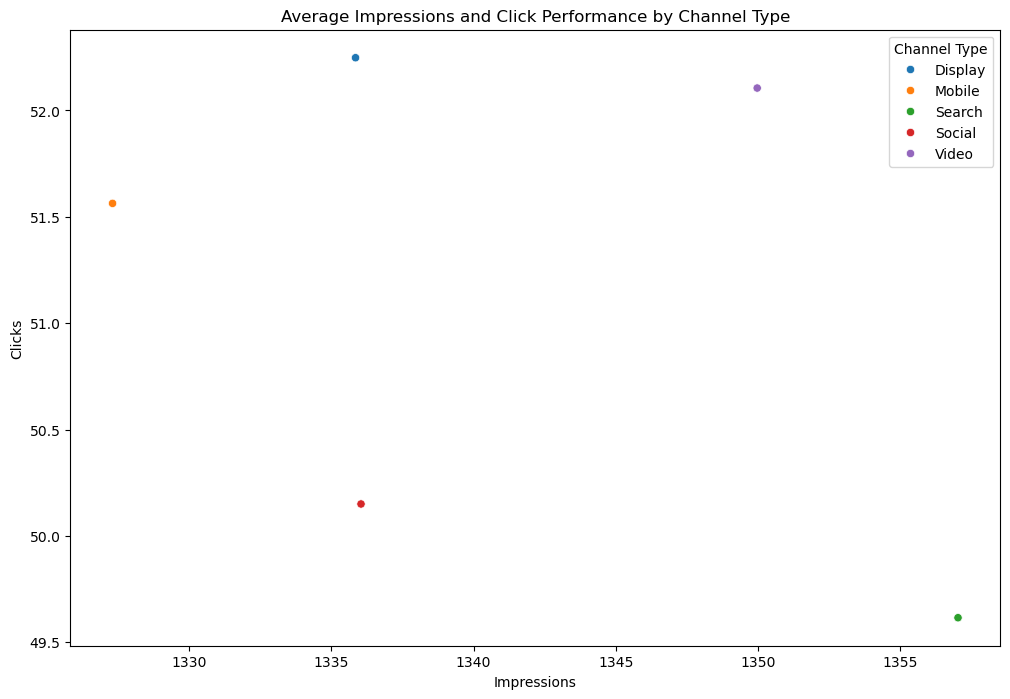

In [29]:
#Create a scatter plot with impressions and clicks (both averaged) so that each channel type is represented only with a single point
aggregated_data = df.groupby('channel_name').agg({'impressions': 'mean', 'clicks': 'mean'}).reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='impressions', y='clicks', hue='channel_name', data=aggregated_data, palette='tab10', legend='full', sizes=(100, 1000))
plt.title('Average Impressions and Click Performance by Channel Type')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.legend(title='Channel Type')

plt.show()

While Display and Video channels have the highest average number of clicks, Mobile has the best clicks to impressions efficiency. 
Consider allocating more budget to Mobile if campaign budget is running low while ensuring clicks.

Search channels are the least effective in attracting clicks despite having the highest average impressions. 
To improve click performance on Search, consider optimizing CTA strategies while refining communications so that viewers find it compelling to click into the ad.

### 4. Impact of Search Tags on Clicks, based on Channel Type

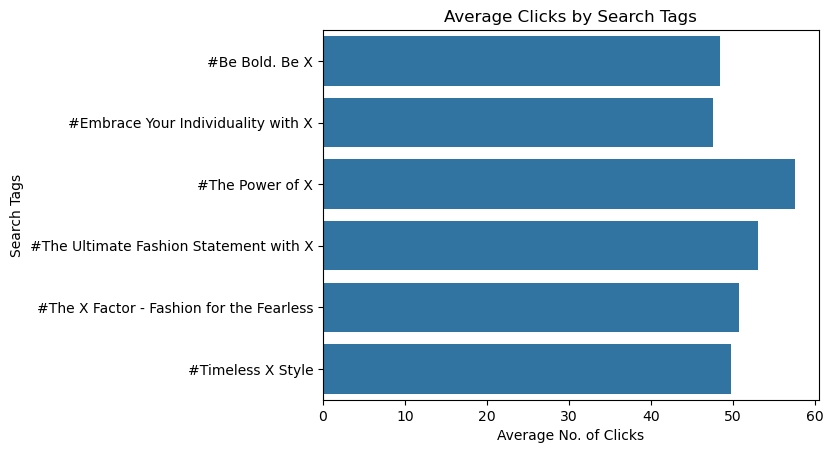

In [30]:
#Group search_tags and sum clicks
grouped_data = df.groupby('search_tags')['clicks'].mean().reset_index()

search_tags = grouped_data['search_tags']
clicks = grouped_data['clicks']

sns.barplot(data=grouped_data, x='clicks', y='search_tags')
plt.title('Average Clicks by Search Tags')
plt.xlabel('Average No. of Clicks')
plt.ylabel('Search Tags')
plt.show()

Search tags improve clicks by increasing visibility of ads, especially when they are more discoverable with search queries
Viewers are more likely to be engaged by ads with more relevant tags, leading to more clicks.

#The Power of X attracted the highest number of clicks across the campaigns.

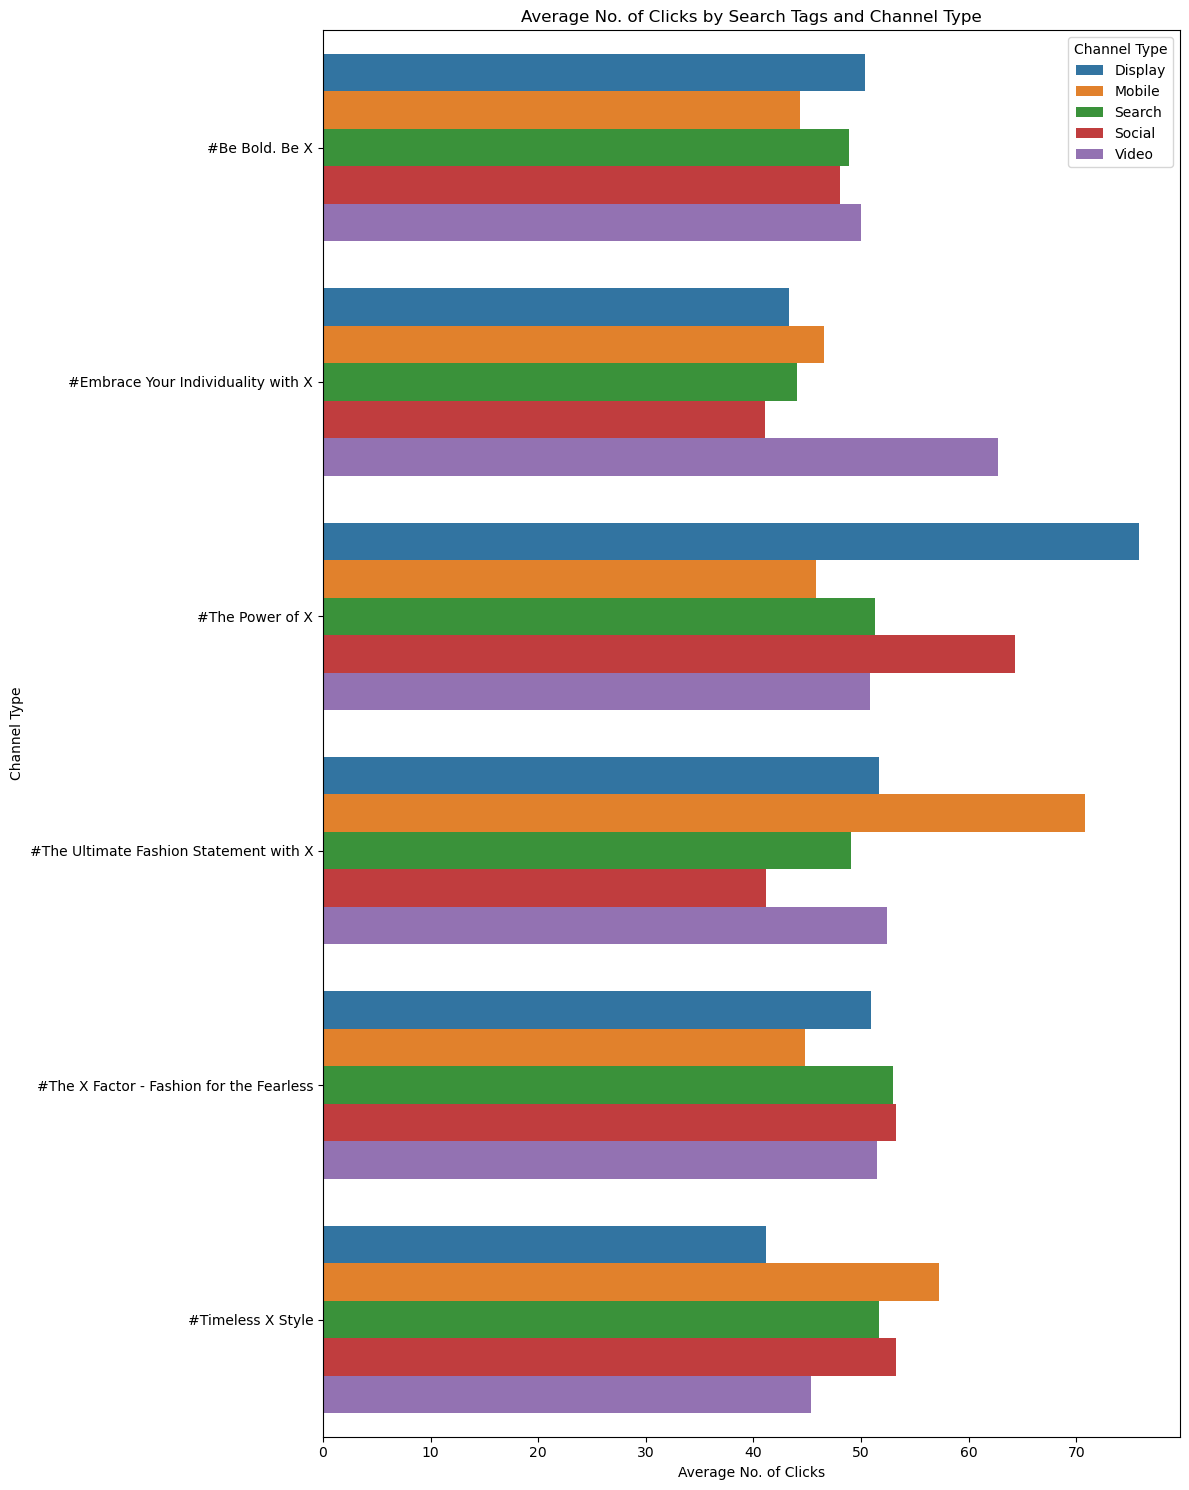

In [31]:
#Group by 'search_tags' and 'channel_name', then sum 'clicks'
grouped_data1 = df.groupby(['search_tags', 'channel_name'])['clicks'].mean().reset_index()

plt.figure(figsize=(12, 15))

#Add Channel name under hue as legend
sns.barplot(data=grouped_data1, x='clicks', y='search_tags', hue='channel_name', palette='tab10')
plt.title('Average No. of Clicks by Search Tags and Channel Type')
plt.xlabel('Average No. of Clicks')
plt.ylabel('Channel Type')
plt.legend(title='Channel Type', loc='upper right')

plt.tight_layout()
plt.show()

When split by channel type, most channels hover around 40-50 average clicks for each search tag, meaning that no channel is significantly less worth investing in.

A few notable trends for the best performing channels are as follows:

'#Embrace Your Individuality with X' - Video. To investigate the impact of Video further, find out whether users have more clicks with short or long-form content on Video.

'#The Power of X' - Display and Social. Enhance creative quality to drive even more clicks since both Display and Social already have higher reach and are less likely to reach new users.

'#The Ultimate Fashion Statement with X' - Mobile. Optimize ad format to better fit on mobile, have more interactive mobile-friendly elements like CTA buttons on mobile.

Consider allocating more budget into these channels for the above search tags to drive more clicks.

### 5. Average CTR over Time

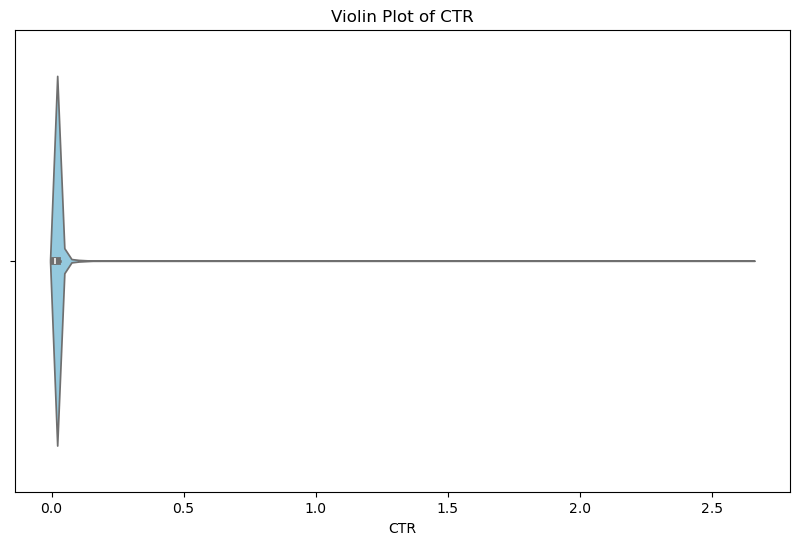

0.0136986301369863
0.017271660384334673


In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['CTR'], color='skyblue')

plt.title('Violin Plot of CTR')
plt.xlabel('CTR')

plt.show()

print(df['CTR'].median())
print(df['CTR'].mean())

Creating a violin plot of click-through rate (clicks/impressions) can inform us of the distribution and density of CTRs, helping us identify high CTRs and learning how other campaigns can achieve higher CTRs.

The median CTR is 0.014 and the mean CTR is only slightly higher at 0.017.

The highest frequency of CTR also appears to just be slightly above 0, with a only a few outliers.

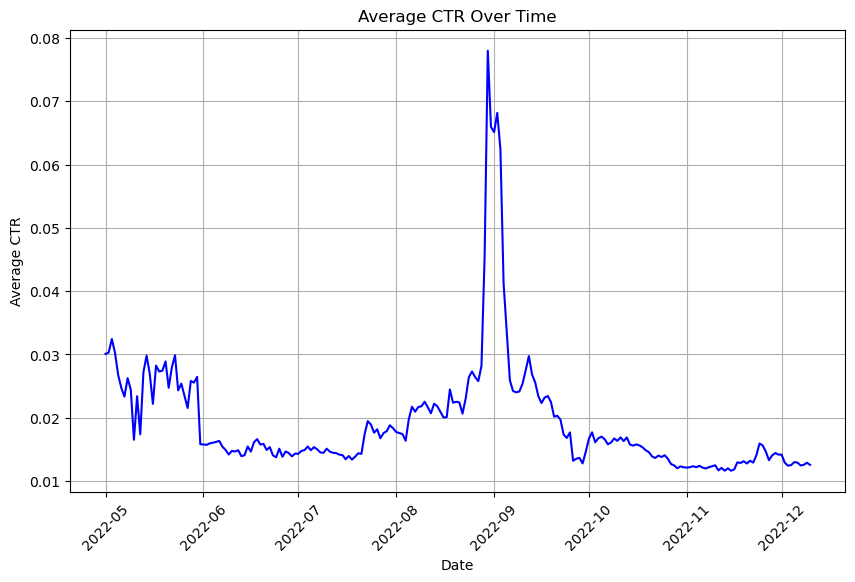

In [34]:
date_grp = df.groupby(['time'])
average_CTR_over_time = date_grp['CTR'].mean()

plt.figure(figsize=(10,6))
plt.plot(average_CTR_over_time.index, average_CTR_over_time.values, label='Average CTR', color='blue')
plt.title('Average CTR Over Time')
plt.xlabel('Date')
plt.ylabel('Average CTR')
plt.grid(True)  
plt.xticks(rotation=45);

Notably, there is a sharp peak in Sept 2022 to nearly 8% average CTR at its highest before declining to around 2% in the other months.

Include more data to check for seasonality patterns across several years. If Sept does have a noticeably higher CTR than other months, it is beneficial to allocate more budget on Sept.

Investigate creative, media cost, channel allocation in Sept to replicate performance in other months.

### 6. Assessment of Average CTR Performance

To better assess whether the campaigns have performed well in CTR, I take a benchmark from [this website](https://www.webfx.com/blog/marketing/whats-good-click-rate-ctr-industry/#:~:text=While%20a%20good%20CTR%20depends,the%20average%20CTR%20is%200.46%25) for the jewelry industry and compare against this average.

An authoritative source of average CTR in the jewelry space cannot be found, so I use 1.9% as the overall benchmark.

In [23]:
#Using the average CTR benchmark, I subdivide the CTRs into two categories
higher_CTR_df = df[df['CTR'] >= 0.019]
lower_CTR_df = df[df['CTR'] < 0.019]

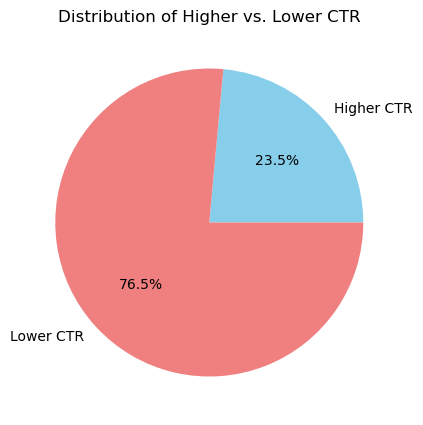

In [24]:
#First, we observe the distribution of higher CTR vs lower CTR in a pie chart
higher_CTR_count = higher_CTR_df.shape[0]
lower_CTR_count = lower_CTR_df.shape[0]

sizes = [higher_CTR_count, lower_CTR_count]
labels = ['Higher CTR', 'Lower CTR']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Higher vs. Lower CTR')

plt.show()

76.5% of CTRs are below the average of 0.019, hence there is room for improvement to improve CTR.

What factors characterize campaigns with higher CTR? I use the following columns to observe any noticeable trends:

channel_name: Search ads could have driven more clicks since consumers actively search for keywords

weekday_cat: Weekend ads might have received more impressions and also more clicks

keywords: Identify any keywords that could have attracted significantly more clicks

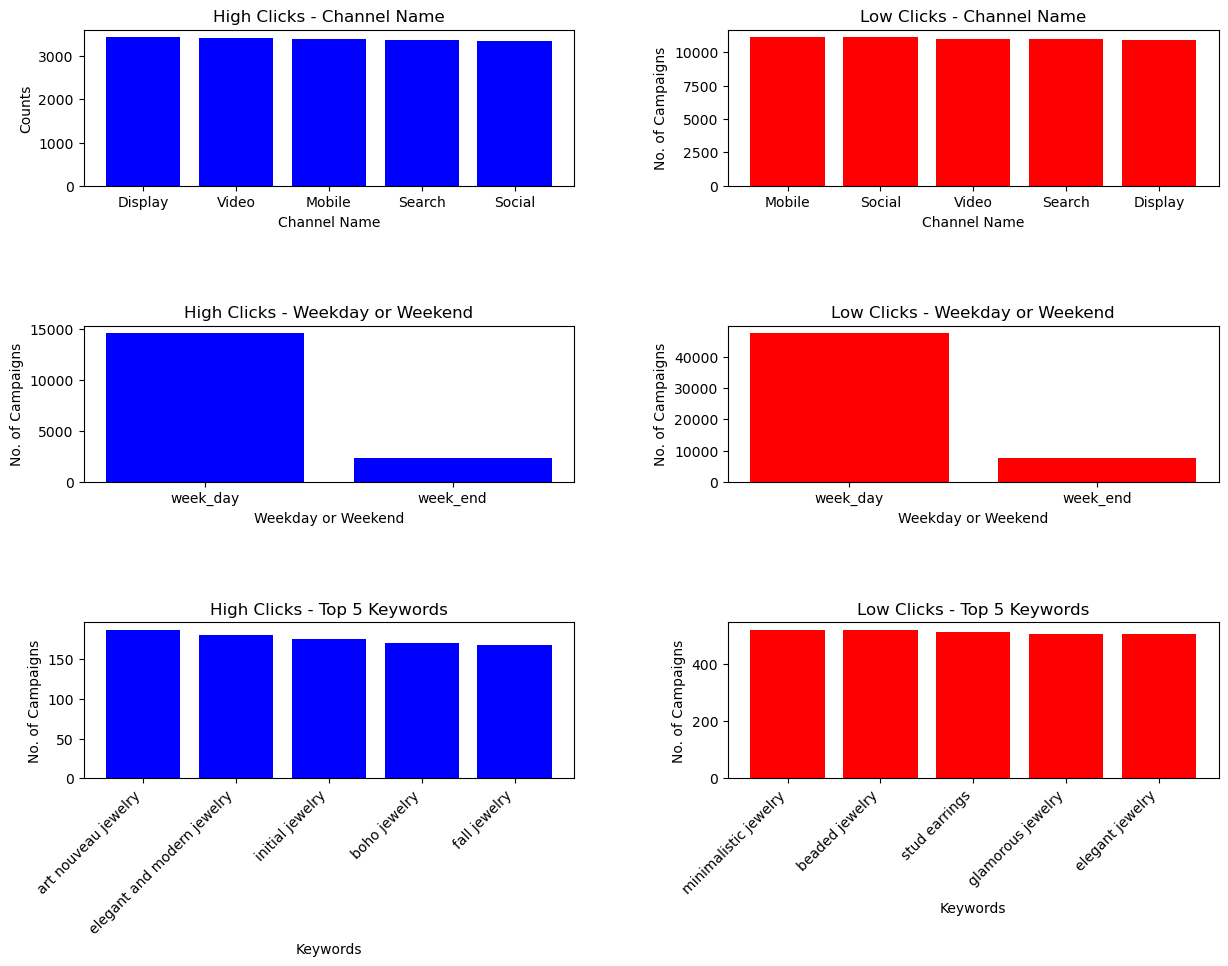

In [25]:
fig, ax = plt.subplots(3, 2, figsize=(14, 10))
fig.tight_layout(pad=8)

#Plot for 'channel_name' in higher_CTR_df
value_counts_1 = higher_CTR_df['channel_name'].value_counts()
ax[0, 0].bar(value_counts_1.index, value_counts_1.values, color='b')
ax[0, 0].set_ylabel('No. of Campaigns')
ax[0, 0].set_xlabel('Channel Name')
ax[0, 0].set_title('Higher CTR - Channel Name');

#Plot for 'channel_name' in lower_CTR_df
value_counts_2 = lower_CTR_df['channel_name'].value_counts()
ax[0, 1].bar(value_counts_2.index, value_counts_2.values, color='r')
ax[0, 1].set_ylabel('No. of Campaigns')
ax[0, 1].set_xlabel('Channel Name')
ax[0, 1].set_title('Lower CTR - Channel Name');

#Plot for 'weekday_cat' in higher_CTR_df
value_counts_3 = higher_CTR_df['weekday_cat'].value_counts()
ax[1, 0].bar(value_counts_3.index, value_counts_3.values, color='b')
ax[1, 0].set_ylabel('No. of Campaigns')
ax[1, 0].set_xlabel('Weekday or Weekend')
ax[1, 0].set_title('Higher CTR - Weekday or Weekend');

#Plot for 'weekday_cat' in lower_CTR_df
value_counts_4 = lower_CTR_df['weekday_cat'].value_counts()
ax[1, 1].bar(value_counts_4.index, value_counts_4.values, color='r')
ax[1, 1].set_ylabel('No. of Campaigns')
ax[1, 1].set_xlabel('Weekday or Weekend')
ax[1, 1].set_title('Lower CTR - Weekday or Weekend');

#Since there are numerous keywords, I will choose to analyze the Top 5 keywords for each df
#Plot for 'keywords' in higher_CTR_df
value_counts_5 = higher_CTR_df['keywords'].value_counts().nlargest(5)
ax[2, 0].bar(value_counts_5.index, value_counts_5.values, color='b')
ax[2, 0].set_ylabel('No. of Campaigns')
ax[2, 0].set_xlabel('Keywords')
ax[2, 0].set_title('Higher CTR - Top 5 Keywords')
ax[2, 0].set_xticks(value_counts_5.index)
ax[2, 0].set_xticklabels(value_counts_5.index, rotation=45, ha='right');

#Plot for 'keywords' in lower_CTR_df
value_counts_6 = lower_CTR_df['keywords'].value_counts().nlargest(5)
ax[2, 1].bar(value_counts_6.index, value_counts_6.values, color='r')
ax[2, 1].set_ylabel('No. of Campaigns')
ax[2, 1].set_xlabel('Keywords')
ax[2, 1].set_title('Lower CTR - Top 5 Keywords')
ax[2, 1].set_xticks(value_counts_6.index)
ax[2, 1].set_xticklabels(value_counts_6.index, rotation=45, ha='right');

No clear trends were identified that consistently characterize campaigns with higher CTRs. making it challenging to tell where to increase clicks.

Alternatively, improving CTR in the long run could also be achieved by reducing average CPC and CPM.

### 7. Assessment of Average CPC and CPM over time

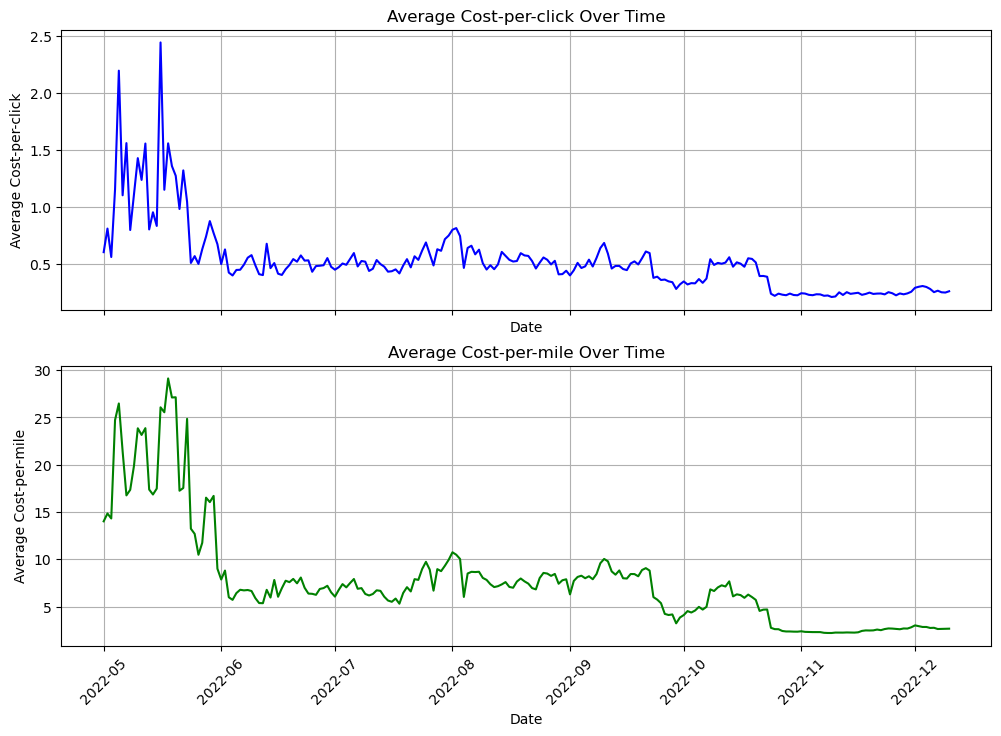

In [26]:
#Use the same x-axis for the second plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

#Creating average cost-per-click and average cost-per-mile
average_cost_per_click = date_grp['Cost-per-click'].mean()
average_cost_per_mile = date_grp['Cost-per-mile'].mean()

#Plot line graphs to show trend over time
ax1.plot(average_cost_per_click.index, average_cost_per_click.values, label='Average Cost-per-click', color='blue')
ax1.set_title('Average Cost-per-click Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Cost-per-click')
ax1.grid(True)  
plt.xticks(rotation=45)

ax2.plot(average_cost_per_mile.index, average_cost_per_mile.values, label='Average Cost-per-mile', color='green')
ax2.set_title('Average Cost-per-mile Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Cost-per-mile')
ax2.grid(True)  
plt.xticks(rotation=45)

plt.show()

Cost-per-click and cost-per-mile are on average higher in May 2022 as the campaigns are still being optimized for cost.

Average CPC declines sharply and stabilizes in the next few months.

Monitor cost in the starting months and lower media spend to optimize both cost-per-click and cost-per-mile.